In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def rk4(f, y0, t, *args):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [ ]:
#Dispersion relation
R_dim = 30e3
R_nondim = R_dim/300e3
beta_dim = 2e-12
beta_nondim = beta_dim * 86400 * 300e3

#Fourier harmonics
S = 10 #spectral radius
N = 41

def omega(k,l):
    return -beta_nondim * k / (k**2 + l**2 + R_nondim**-2)

def A(k,l):
  return 0.0001


In [ ]:
np.pi % (2 *np.pi)
-np.pi % (2*np.pi)

3.141592653589793

In [ ]:
k,l = np.linspace(-S,S,N),np.linspace(-S,S,N)
K,L = np.meshgrid(k,l)
phi = np.random.uniform(0,2*np.pi,size=(N,N))

def modulo_grid(x, y):
  x_mod = np.mod(x + np.pi, 2 * np.pi) - np.pi
  y_mod = np.mod(y + np.pi, 2 * np.pi) - np.pi
  return x_mod, y_mod

omega_vals = omega(K,L)
def f(t,pos):
  x_mod,y_mod = modulo_grid(*pos)
  t = 30
  A = 0.001
  dx = np.real(np.sum(1j*K*1*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  dy = np.real(np.sum(1j*L*1*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  return [dx,dy]

In [ ]:
from scipy.integrate import solve_ivp

x,y = np.linspace(-np.pi,np.pi,100),np.linspace(-np.pi,np.pi,100)
X,Y = np.meshgrid(x,y)

t_span = (0,5000)
y0 = [2,1]
sol = solve_ivp(f,t_span,y0,max_step=0.01, atol = 1, rtol = 1)

path = sol.y




KeyboardInterrupt: ignored

In [ ]:
t_vals = np.linspace(0,5000,100)
h = 0.1
y0 = [2,1]
sol = rk4(f,y0,t_vals)

TypeError: ignored

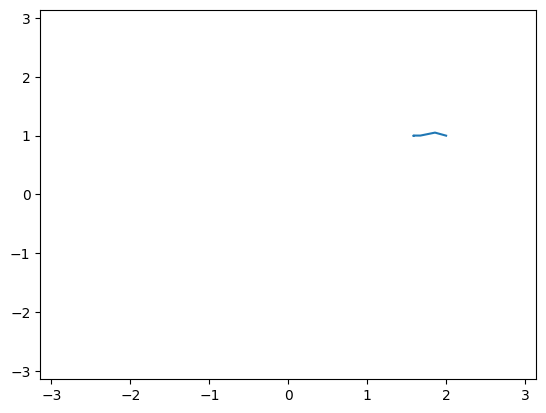

In [ ]:
plt.plot(path[0],path[1])
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

plt.show()